<a href="https://colab.research.google.com/github/VivekAlamwar/new-repo/blob/main/Dealer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/RFM Analysis data.csv')

In [ ]:
df.head()

,YEAR,BUYING_DEALER,TOKEN_DONE,SUM_BID_AT_BOUGHT,AVG_BID_AT_BOUGHT,RECENT_BUY_DATE
0,2021,85554,7,2296331,328047.3,2021-10-28
1,2022,23575,62,16178297,260940.3,2022-12-19
2,2020,75812,7279,2262802375,310867.2,2020-12-31
3,2018,anchor01,19141,233186992,12182.6,2018-12-04
4,2024,94749,19,1689500,88921.1,2024-03-28


In [ ]:
df_final=df.groupby('BUYING_DEALER').agg({'TOKEN_DONE':'sum','SUM_BID_AT_BOUGHT':'sum','RECENT_BUY_DATE':'max'}).reset_index()

In [ ]:
df_final=df.groupby('BUYING_DEALER').agg({'TOKEN_DONE':'sum','SUM_BID_AT_BOUGHT':'sum','RECENT_BUY_DATE':'max'}).reset_index()

In [ ]:
df_final.columns=['BUYING_DEALER','FREQUENCY','MONETARY','RECENCY']

In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY
0,100001,5,1284119,2022-07-04
1,100002,63,11993787,2024-01-01
2,100007,1,413100,2021-08-05
3,100009,2,1204600,2022-08-18
4,100011,10,2634385,2024-01-19


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BUYING_DEALER  27030 non-null  object
 1   FREQUENCY      27030 non-null  int64 
 2   MONETARY       27030 non-null  int64 
 3   RECENCY        27030 non-null  object
dtypes: int64(2), object(2)
memory usage: 844.8+ KB


In [ ]:
df_final['max_date']=df_final['RECENCY'].max()

In [ ]:
df_final['RECENCY1']=(pd.to_datetime(df_final['max_date'])-pd.to_datetime(df_final['RECENCY'])).dt.days+1

In [ ]:
df_final.drop(columns=['max_date'],inplace=True)

In [ ]:
df_final.drop(columns=['RECENCY'],inplace=True)

In [ ]:
df_final.loc[df_final['RECENCY1']=='0']

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1


In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1
0,100001,5,1284119,680
1,100002,63,11993787,134
2,100007,1,413100,1013
3,100009,2,1204600,635
4,100011,10,2634385,116


In [ ]:
df_final['RECENCY1']

0         680
1         134
2        1013
3         635
4         116
         ... 
27025    1927
27026    2538
27027    2389
27028    2254
27029    2228
Name: RECENCY1, Length: 27030, dtype: int64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BUYING_DEALER  27030 non-null  object
 1   FREQUENCY      27030 non-null  int64 
 2   MONETARY       27030 non-null  int64 
 3   RECENCY1       27030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 844.8+ KB


In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1
0,100001,5,1284119,680
1,100002,63,11993787,134
2,100007,1,413100,1013
3,100009,2,1204600,635
4,100011,10,2634385,116


#**Normalizing the data on the scale of 1-5**

In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1
0,100001,5,1284119,680
1,100002,63,11993787,134
2,100007,1,413100,1013
3,100009,2,1204600,635
4,100011,10,2634385,116


In [ ]:
df_final['RECENCY2']=round((1/df_final['RECENCY1'])*1000,0)

In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1,RECENCY2
0,100001,5,1284119,680,1.0
1,100002,63,11993787,134,7.0
2,100007,1,413100,1013,1.0
3,100009,2,1204600,635,2.0
4,100011,10,2634385,116,9.0


In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1,RECENCY2
0,100001,5,1284119,680,1.0
1,100002,63,11993787,134,7.0
2,100007,1,413100,1013,1.0
3,100009,2,1204600,635,2.0
4,100011,10,2634385,116,9.0


In [ ]:
for column in ['FREQUENCY','MONETARY','RECENCY2']:
  df_final[column+'Normalized']=pd.qcut(df_final[column],q=[0,0.2,0.6,0.8,1],labels=False)+1

In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1,RECENCY2,FREQUENCYNormalized,MONETARYNormalized,RECENCY2Normalized
0,100001,5,1284119,680,1.0,2,2,1
1,100002,63,11993787,134,7.0,4,4,3
2,100007,1,413100,1013,1.0,1,2,1
3,100009,2,1204600,635,2.0,1,2,2
4,100011,10,2634385,116,9.0,2,2,3


In [ ]:
df_final.sort_values(by='RECENCY2',ascending=False)

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1,RECENCY2,FREQUENCYNormalized,MONETARYNormalized,RECENCY2Normalized
24642,90259,42,7225398,1,1000.0,4,3,4
17262,68812,54,10777551,1,1000.0,4,4,4
14478,63285,360,84327871,1,1000.0,4,4,4
4104,113618,8,1900400,1,1000.0,2,2,4
15216,64688,48,19362222,1,1000.0,4,4,4
...,...,...,...,...,...,...,...,...
9476,54892,4,1617500,2215,0.0,2,2,1
9465,54831,2,1004000,2546,0.0,1,2,1
9459,54810,10,2804000,2534,0.0,2,2,1
9436,54747,3,541000,2467,0.0,2,2,1


In [ ]:
df_final['RFM_SCORE']=df_final['FREQUENCYNormalized']+df_final['MONETARYNormalized']+df_final['RECENCY2Normalized']

In [ ]:
df_final.head()

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1,RECENCY2,FREQUENCYNormalized,MONETARYNormalized,RECENCY2Normalized,RFM_SCORE
0,100001,5,1284119,680,1.0,2,2,1,5
1,100002,63,11993787,134,7.0,4,4,3,11
2,100007,1,413100,1013,1.0,1,2,1,4
3,100009,2,1204600,635,2.0,1,2,2,5
4,100011,10,2634385,116,9.0,2,2,3,7


#Categorizing the dealers on the basis of rfm score.
- 0-7 as at_risk
- 8-9 as potential loyalists
- 10-11 as loyal dealers
- 12-14 as champions dealers


In [ ]:
df_final['Dealer_type']=pd.cut(df_final['RFM_SCORE'],
                               bins=[0,7,9,11,14],
                               labels=['at_risk','potential loyalists','loyal dealers','champions dealers'])

In [ ]:
df_final

,BUYING_DEALER,FREQUENCY,MONETARY,RECENCY1,RECENCY2,FREQUENCYNormalized,MONETARYNormalized,RECENCY2Normalized,RFM_SCORE,Dealer_type
0,100001,5,1284119,680,1.0,2,2,1,5,at_risk
1,100002,63,11993787,134,7.0,4,4,3,11,loyal dealers
2,100007,1,413100,1013,1.0,1,2,1,4,at_risk
3,100009,2,1204600,635,2.0,1,2,2,5,at_risk
4,100011,10,2634385,116,9.0,2,2,3,7,at_risk
...,...,...,...,...,...,...,...,...,...,...
27025,test2,11,1506000,1927,1.0,2,2,1,5,at_risk
27026,test23,2,1580000,2538,0.0,1,2,1,4,at_risk
27027,test29,87,12503305,2389,0.0,4,4,1,9,potential loyalists
27028,test48,76,17620007,2254,0.0,4,4,1,9,potential loyalists


In [ ]:
heat_map=pd.pivot_table(df_final,index='Dealer_type',
               columns='RFM_SCORE',
               aggfunc='size',
               fill_value=0)

In [ ]:
heat_map

RFM_SCORE,3,4,5,6,7,8,9,10,11,12
Dealer_type,,,,,,,,,,
at_risk,3561,2840,4543,2852,2815,0,0,0,0,0
potential loyalists,0,0,0,0,0,2352,2190,0,0,0
loyal dealers,0,0,0,0,0,0,0,1963,1642,0
champions dealers,0,0,0,0,0,0,0,0,0,2272


<Axes: xlabel='RFM_SCORE', ylabel='Dealer_type'>

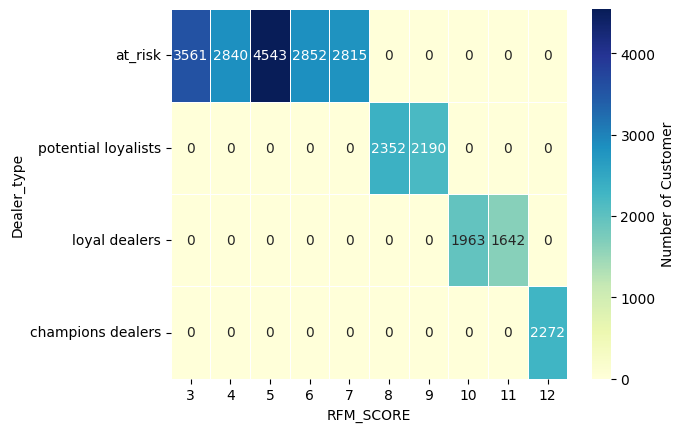

In [ ]:
sns.heatmap(heat_map,annot=True,fmt='d',cmap='YlGnBu',linewidths=0.5,cbar_kws={'label':'Number of Customer'})

In [ ]:
df_final['BUYING_DEALER'].nunique()

27030

In [ ]:
df_final.to_csv('C:\\Users\\New User\\OUTPUT.csv')

In [ ]:
#DEALER SEGMENTATION
#RECENCY-FREQUENCY-MONETARY
#Created Dealer Segmentation by using recency-frequency-monetary analysis. It helped to catergorize the dealers into different segments, which help to onboard the at_rist (1.2%) and potential loyalist (5.3%) dealer.
#Successfully  onboard the 5.3% (245/4542 dealers) potential loyalists dealer and 1.2% at rist dealer (205/16611)

DEALER SEGMENTATION
* RECENCY-FREQUENCY-MONETARY

* Created Dealer Segmentation using Recency-Frequency-Monetary (RFM) analysis. This method categorized dealers into different segments, helping to identify and onboard at-risk (1.2%) and potential loyalist (5.3%) dealers. Successfully onboarded 5.3% (245 out of 4,542) potential loyalist dealers and 1.2% (205 out of 16,611) at-risk dealers.